Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

**1. Load Dataset**

In [6]:
pd.set_option("display.max_columns", None)

df = pd.read_csv("ecommerce_sales_data (2).csv")
df.head(10)

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28
5,2023-12-01,Camera,Electronics,West,1,524,106.35
6,2023-10-09,Headphones,Accessories,North,7,6167,1027.98
7,2022-01-14,Camera,Electronics,South,7,3059,873.50
8,2022-04-02,Smartwatch,Electronics,East,9,5526,595.28
9,2024-10-22,Printer,Office,South,8,672,186.37


**2. Data Quality Assessment**

2.1 Check Data Types

In [8]:
df.dtypes

,0
Order Date,object
Product Name,object
Category,object
Region,object
Quantity,int64
Sales,int64
Profit,float64


2.2 Convert Incorrect Data Types

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes

,0
Order Date,datetime64[ns]
Product Name,object
Category,object
Region,object
Quantity,int64
Sales,int64
Profit,float64


**3. Handling Missing Values**

3.1 Detect Missing Values

In [10]:
df.isna().sum()

,0
Order Date,0
Product Name,0
Category,0
Region,0
Quantity,0
Sales,0
Profit,0


3.2 Demonstration: Introduce Artificial Missing Values

In [17]:
df_missing = df.copy()
df_missing.loc[0:5, 'Profit'] = np.nan
df_missing.isna().sum()

,0
Order Date,0
Product Name,0
Category,0
Region,0
Quantity,0
Sales,0
Profit,6


Median Imputation
was used for the 'Profit' column because financial data may contain outliers, and the median is more robust than the mean.

In [19]:
df_imputed = df_missing.copy()
df_imputed['Profit'] = df_imputed['Profit'].fillna(df_imputed['Profit'].median())
df_imputed.isna().sum()

,0
Order Date,0
Product Name,0
Category,0
Region,0
Quantity,0
Sales,0
Profit,0


4. Handling Outliers

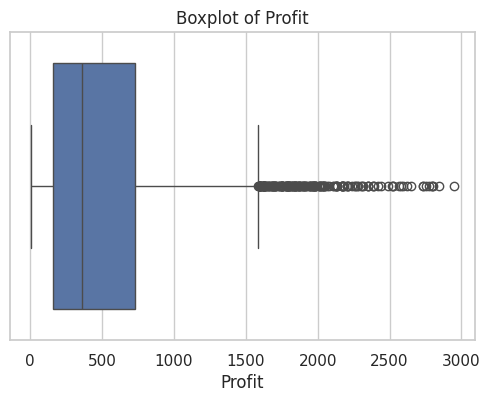

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Profit'])
plt.title("Boxplot of Profit")
plt.show()

Detect Outliers using IQR

In [21]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Profit'] < lower) | (df['Profit'] > upper)]
outliers.head(10)

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
12,2023-12-21,Tablet,Electronics,North,7,7462,2166.17
32,2023-04-09,Laptop,Electronics,North,9,10773,1907.36
55,2023-12-28,Headphones,Accessories,East,7,8155,1587.91
60,2022-09-26,Headphones,Accessories,South,7,6895,1596.35
92,2022-12-14,Camera,Electronics,South,7,7518,1655.91
98,2023-05-17,Mouse,Accessories,East,9,7101,2105.82
103,2022-04-15,Mouse,Accessories,East,9,7884,2054.02
125,2024-07-07,Smartphone,Electronics,South,8,7456,1702.48
137,2023-12-25,Mouse,Accessories,North,6,7146,1627.42
143,2022-11-14,Monitor,Accessories,West,7,8176,2308.76


Remove Outliers

In [23]:
df_no_outliers = df[(df['Profit'] >= lower) & (df['Profit'] <= upper)]

print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (3500, 7)
After removing outliers: (3316, 7)


Capping Outliers (Percentile Method)

In [25]:
lower_cap = df['Profit'].quantile(0.05)
upper_cap = df['Profit'].quantile(0.95)

df_capped = df.copy()
df_capped['Profit'] = df_capped['Profit'].clip(lower_cap, upper_cap)

5. Data Transformation – Normalization

In [ ]:
5.1 Min-Max Normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = df[['Quantity', 'Sales', 'Profit']].copy()

df_scaled[['Quantity', 'Sales', 'Profit']] = scaler.fit_transform(df_scaled)

df_scaled.head()

,Quantity,Sales,Profit
0,0.375,0.334452,0.116315
1,0.750,0.106793,0.033864
2,0.500,0.541795,0.168628
3,0.125,0.068493,0.066634
4,0.000,0.042680,0.032759


5.2 Standardization (Z-score)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_standardized = df[['Quantity', 'Sales', 'Profit']].copy()

df_standardized[['Quantity', 'Sales', 'Profit']] = scaler.fit_transform(df_standardized)

df_standardized.head()

,Quantity,Sales,Profit
0,-0.361757,0.242650,-0.353360
1,0.803054,-0.758635,-0.834247
2,0.026513,1.154586,-0.048242
3,-1.138297,-0.927087,-0.643122
4,-1.526567,-1.040618,-0.840695


5.3 Check Correlation Before PCA

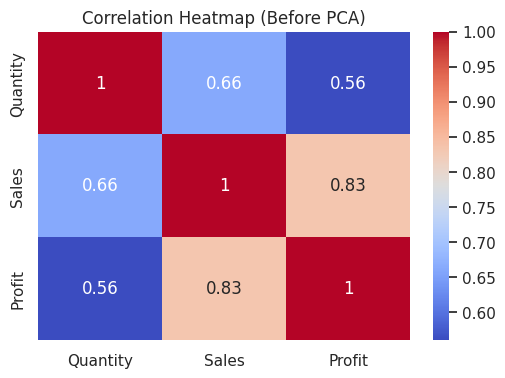

In [28]:
plt.figure(figsize=(6,4))
sns.heatmap(df_standardized[['Quantity','Sales','Profit']].corr(),
            annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap (Before PCA)")
plt.show()

6. Data Reduction – Principal Component Analysis (PCA)

In [29]:
from sklearn.decomposition import PCA

X = df_standardized[['Quantity', 'Sales', 'Profit']]

In [30]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())

Explained Variance Ratio: [0.79232603 0.15626687]
Total explained variance: 0.9485928991275557


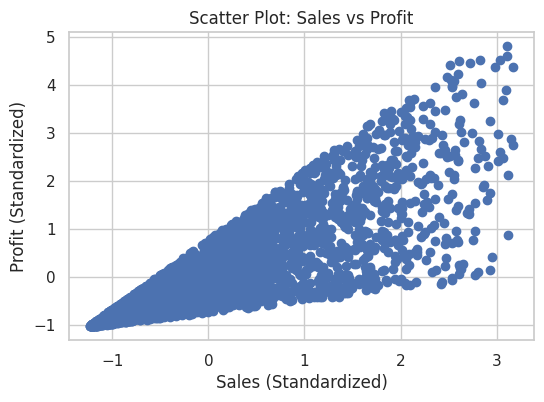

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(df_standardized['Sales'], df_standardized['Profit'])
plt.xlabel("Sales (Standardized)")
plt.ylabel("Profit (Standardized)")
plt.title("Scatter Plot: Sales vs Profit")
plt.show()

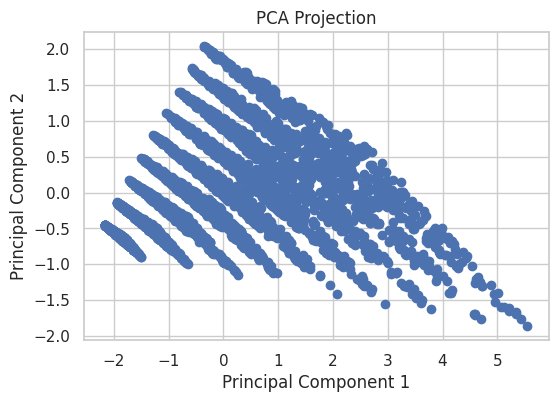

In [32]:
plt.figure(figsize=(6,4))
plt.scatter(principal_components[:,0], principal_components[:,1])
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [33]:
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,-0.251558,-0.175120
1,-0.524683,1.266654
2,0.690920,-0.220634
3,-1.549204,-0.399226
4,-1.941077,-0.593451
